# Classification Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

We, **Team 6**, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: EDSA - Climate Change Belief Analysis 2022

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, you are challenged to create a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [442]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix\

import matplotlib.pyplot as plt
import string
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

---
## Discussion of libraries that will be used

---

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `train.csv` file into a DataFrame. |

---

In [369]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [370]:
df['message'][2]

'RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…'

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |



Here we use various methods to take an in-depth look at our dataframe. These methods include:
<ul>
<li>isnull()</li>
<li>info()</li>
<li>isna()</li>
<li>shape</li>

</ul>

In [371]:
df.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [372]:
df.shape

(15819, 3)

In [373]:
# look at data statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [374]:
sentiment_labels = list(df.sentiment.unique())
print(sentiment_labels)

[1, 2, 0, -1]


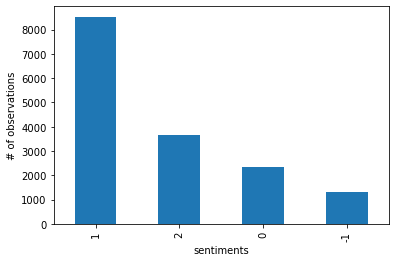

In [375]:
df['sentiment'].value_counts().plot(kind = 'bar')
plt.ylabel("# of observations")
plt.xlabel("sentiments")
plt.show()

In [376]:
#word cloud
#balanced and imbalanced data

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [377]:
#No need for this step

'''all_msg = []
for i, row in df.iterrows():
    for msg in row['message'].split(' '):
        all_msg.append([row['sentiment'], msg, row['tweetid']])
all_msg = pd.DataFrame(all_msg, columns=['sentiment', 'message', 'tweetid'])'''

"all_msg = []\nfor i, row in df.iterrows():\n    for msg in row['message'].split(' '):\n        all_msg.append([row['sentiment'], msg, row['tweetid']])\nall_msg = pd.DataFrame(all_msg, columns=['sentiment', 'message', 'tweetid'])"

In [378]:
all_msg = df.copy()

In [379]:
all_msg.shape

(15819, 3)

In [380]:
all_msg.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


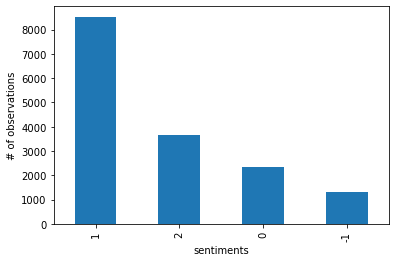

In [381]:
all_msg['sentiment'].value_counts().plot(kind = 'bar')
plt.ylabel("# of observations")
plt.xlabel("sentiments")
plt.show()

In [382]:
#removing web URL
#COnsider removing twitter handles

pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
all_msg['message'] = all_msg['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [383]:
all_msg.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [384]:
#converting message column to lower case

all_msg['message'] = all_msg['message'].str.lower()

In [385]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [386]:
#remove punctuation

def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

In [387]:
all_msg['message'] = all_msg['message'].apply(remove_punctuation)

In [388]:
all_msg.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,its not like we lack evidence of anthropogenic...,126103
2,2,rt rawstory researchers say we have three year...,698562
3,1,todayinmaker wired 2016 was a pivotal year in...,573736
4,1,rt soynoviodetodas its 2016 and a racist sexis...,466954


In [389]:
all_msg['message'][47]

'will anyone who supports trumps view of climate change non polluter cronie please step forward resist impeach urlweb'

In [390]:
tokeniser = TreebankWordTokenizer()
all_msg['tokens'] = all_msg['message'].apply(tokeniser.tokenize)

In [391]:
all_msg.head()

,sentiment,message,tweetid,tokens
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,its not like we lack evidence of anthropogenic...,126103,"[its, not, like, we, lack, evidence, of, anthr..."
2,2,rt rawstory researchers say we have three year...,698562,"[rt, rawstory, researchers, say, we, have, thr..."
3,1,todayinmaker wired 2016 was a pivotal year in...,573736,"[todayinmaker, wired, 2016, was, a, pivotal, y..."
4,1,rt soynoviodetodas its 2016 and a racist sexis...,466954,"[rt, soynoviodetodas, its, 2016, and, a, racis..."


In [392]:
# find the stem of each word in words
stemmer = SnowballStemmer('english')

In [393]:
def mbti_stemmer(words, stemmer):
    return [stemmer.stem(word) for word in words]

In [394]:
all_msg['stem'] = all_msg['tokens'].apply(mbti_stemmer, args=(stemmer, ))

In [395]:
lemmatizer = WordNetLemmatizer()

In [396]:
def mbti_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]    

In [397]:
all_msg['lemma'] = all_msg['tokens'].apply(mbti_lemma, args=(lemmatizer, ))

In [398]:
def remove_stop_words(tokens):    
    return [t for t in tokens if t not in stopwords.words('english')]

In [399]:
#In case you want to run the analysis again without stop words, uncomment and run the following cell! 
#Be warned, this can take long with the pandas apply function

# all_mbti['stem'] = all_mbti['tokens'].apply(remove_stop_words)

In [400]:
#The NLTK classifiers expect dict style feature sets, so we must therefore transform our text into a dict

def bag_of_words_count(words, word_dict={}):
    """ this function takes in a list of words and returns a dictionary 
        with each word as a key, and the value represents the number of 
        times that word appeared"""
    for word in words:
        if word in word_dict.keys():
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict

In [401]:
#Here we create a set of dictionaries, one for each of the MBTI types.


believe = {}
for pp in sentiment_labels:
    df_2 = all_msg.groupby('sentiment')
    believe[pp] = {}
    for row in df_2.get_group(pp)['tokens']:
        believe[pp] = bag_of_words_count(row, believe[pp]) 

In [402]:
#Next, we create a list of all of the unique words.

all_words = set()
for pp in sentiment_labels:
    for word in believe[pp]:
        all_words.add(word)

In [403]:
#This was done so that we can create a combined bag of words dictionary for all the words in the text.

believe['all'] = {}
for pp in sentiment_labels:    
    for word in all_words:
        if word in believe[pp].keys():
            if word in believe['all']:
                believe['all'][word] += believe[pp][word]
            else:
                believe['all'][word] = believe[pp][word]    

In [404]:
#Now we can easily calculate how many words there are in total.

total_words = sum([v for v in believe['all'].values()])
total_words

278214

Text(0.5, 0, 'word frequency')

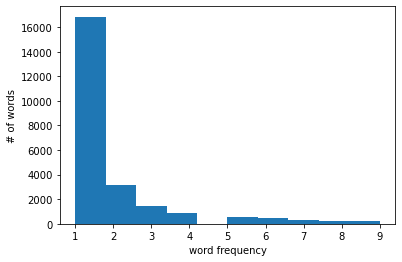

In [405]:
#Let's take a look at the distribution of words which occur less than 10 times in the whole dataset.

_ = plt.hist([v for v in believe['all'].values() if v < 10],bins=10)
plt.ylabel("# of words")
plt.xlabel("word frequency")

In [406]:
#There are a lot of words that only appear once! We'll print out that value here.

len([v for v in believe['all'].values() if v == 1])

16846

In [407]:
#What kind of words do you think would appear once out of roughly 8 million words?
#Let's print out a few of these rare words.

rare_words = [k for k, v in believe['all'].items() if v==1] 
print(rare_words[:100])

['loooooads', 'collected', 'oilwhore', 'tvs', 'crimin…', 'adelaconchado', 'servants', 'currency', 'katharine', 'tokimonsta', 'changeso', 'argentinian', 'pasignyc', 'dgã¢â‚¬â¦', 'roparbarbara', 'tacloban', 'generat…', 'if…', 'declined', 'galkamax', 'empower…', 'legitimizing', 'adopt…', 'mitchkasaberi', 'tweetsoutloud', 'truue', 'genl', 'theconversation', 'prez', 'spacekatgal', 'saturn', 'endeavoursci', 'newinfr…', 'lisang', '215', 'mountaineer', 'godd…', 'jamieszymko', 'guyshrubsole', 'cats', 'stevendeknight', 'sec…', '100pmin', 'joelwwood', 'gearing', 'conduct', 'chiã¢â‚¬â¦', 'impactsã¢â‚¬â¦', 'kimmicflatworld', 'misandrism', 'nitrous', 'distressed', '“value”', 'challengesrise', 'changegtgt…', 'baptcare', 'ulrichjvv', 'protest…', 'exist😔', 'jose', 'fiesta', 'paxamslays', 'raid', '……', 'islandphone', 'todayour', 'politics…', 'climatejusticemonth', 'josefgoldilock', 'capandtradethats', 'jayelharris', 'sweatshirt', 'commonwealthsecfiji', 'conways', 'glocam', 'staffed', 'staff…', 'sessions

In [408]:
#As you can see, some of these words don't make sense, but before we decide to remove them, 
#let's see how much data we'll be left with.

# how many words appear more than 10 times?
# how many words of the total does that account for?
print(len([v for v in believe['all'].values() if v >= 10]))
occurs_more_than_10_times = sum([v for v in believe['all'].values() if v >= 10])
print(occurs_more_than_10_times)

2494
235570


In [409]:
occurs_more_than_10_times/total_words

0.846722307288634

In [410]:
# Finally, let's remove all words that occur less than 10 times.

max_count = 10
remaining_word_index = [k for k, v in believe['all'].items() if v > max_count]

In [411]:
#HYPOTHESIS TESTING

#Let's see if we finally have what we need to test it out. 
#We'll first create one big dataframe with the word counts by personality profile

hm = []
for p, p_bow in believe.items():
    df_bow = pd.DataFrame([(k, v) for k, v in p_bow.items() if k in remaining_word_index], columns=['Word', p])
    df_bow.set_index('Word', inplace=True)
    hm.append(df_bow)

# create one big dataframe
df_bow = pd.concat(hm, axis=1)
df_bow.fillna(0, inplace=True)

In [412]:
#What are the top 10 words which appear most often?

df_bow.sort_values(by='all', ascending=False).head(10)

,1,2,0,-1,all
Word,,,,,
climate,7346.0,3327.0,1437.0,787.0,12897
change,6968.0,3139.0,1370.0,735.0,12212
rt,5796.0,2151.0,1091.0,684.0,9722
urlweb,3188.0,3627.0,754.0,459.0,8028
the,4769.0,1129.0,946.0,844.0,7688
to,4314.0,1624.0,747.0,478.0,7163
is,2841.0,408.0,592.0,526.0,4367
of,2604.0,801.0,455.0,349.0,4209
a,2680.0,537.0,564.0,348.0,4129


In [413]:
#This isn't very helpful at all, is it? It's very difficult to extract insights from this data. 
#Let's see if we can use the  𝑐ℎ𝑖2  test to see whether Introverts favour the word I. 
#We'll do this first by extracting introvert types only from all the personality types.

#pro_types = [p for p in sentiment_labels if p[0] == 'I']

#Now we'll calculate and add percentage columns.
for col in [1, 2, 0, -1, 'all']:
    df_bow[str(col)+'_perc'] = df_bow[col] / df_bow[col].sum()

In [414]:
df_bow.head()

,1,2,0,-1,all,1_perc,2_perc,0_perc,-1_perc,all_perc
Word,,,,,,,,,,
epa,268.0,240.0,29.0,16.0,553,0.001957,0.005113,0.000951,0.000823,0.002365
chief,66.0,100.0,5.0,5.0,176,0.000482,0.002131,0.000164,0.000257,0.000753
doesnt,718.0,21.0,53.0,20.0,812,0.005242,0.000447,0.001739,0.001029,0.003473
think,234.0,16.0,81.0,29.0,360,0.001708,0.000341,0.002657,0.001492,0.001540
carbon,96.0,78.0,12.0,15.0,201,0.000701,0.001662,0.000394,0.000772,0.000860


In [415]:
# calculate chi2
df_bow['1_chi2'] = np.power((df_bow['1_perc'] - df_bow['all_perc']), 2) / df_bow['all_perc']
df_bow['2_chi2'] = np.power((df_bow['2_perc'] - df_bow['all_perc']), 2) / df_bow['all_perc']
df_bow['0_chi2'] = np.power((df_bow['0_perc'] - df_bow['all_perc']), 2) / df_bow['all_perc']
df_bow['-1_chi2'] = np.power((df_bow['-1_perc'] - df_bow['all_perc']), 2) / df_bow['all_perc']

In [416]:
df_bow[['1_perc', 'all_perc', '1_chi2']][df_bow['1_perc'] > df_bow['all_perc']].sort_values(by='1_chi2', ascending=False).head(10)

,1_perc,all_perc,1_chi2
Word,,,
shes,0.004570,0.002720,0.001259
believe,0.007308,0.004935,0.001141
doesnt,0.005242,0.003473,0.000901
we,0.008703,0.006441,0.000794
going,0.004307,0.002865,0.000726
die,0.002877,0.001788,0.000663
stephenschlegel,0.002241,0.001313,0.000656
husband,0.002278,0.001356,0.000627
thinking,0.002460,0.001510,0.000599


In [417]:
df_bow[['2_perc', 'all_perc', '2_chi2']][df_bow['2_perc'] > df_bow['all_perc']].sort_values(by='2_chi2', ascending=False).head(10)

,2_perc,all_perc,2_chi2
Word,,,
urlweb,0.077277,0.034334,0.053710
trump,0.017620,0.008276,0.010552
via,0.006157,0.002207,0.007072
says,0.005113,0.001835,0.005859
climate,0.070885,0.055158,0.004484
thehill,0.001747,0.000411,0.004351
reuters,0.001428,0.000299,0.004251
change,0.066880,0.052228,0.004110
study,0.002067,0.000620,0.003374


In [418]:
df_bow[['0_perc', 'all_perc', '0_chi2']][df_bow['0_perc'] > df_bow['all_perc']].sort_values(by='0_chi2', ascending=False).head(10)

,0_perc,all_perc,0_chi2
Word,,,
warming,0.032183,0.014597,0.021188
global,0.033954,0.016098,0.019808
penguin,0.002756,0.000385,0.014603
i,0.011548,0.005017,0.008503
club,0.001443,0.000210,0.007265
my,0.004396,0.001424,0.006201
hes,0.002526,0.000710,0.004646
interviewer,0.000689,0.000090,0.003997
melania,0.000722,0.000098,0.003950


In [419]:
df_bow[['-1_perc', 'all_perc', '-1_chi2']][df_bow['-1_perc'] > df_bow['all_perc']].sort_values(by='-1_chi2', ascending=False).head(10)

,-1_perc,all_perc,-1_chi2
Word,,,
scam,0.002522,0.000227,0.023235
stevesgoddard,0.002264,0.000197,0.021729
warming,0.030723,0.014597,0.017815
global,0.032524,0.016098,0.016760
noncompetitive,0.001184,0.000098,0.011973
liberals,0.001544,0.000163,0.011741
alarmists,0.001081,0.000090,0.010932
tax,0.001595,0.000197,0.009942
manipulated,0.001235,0.000128,0.009547


In [420]:
vect = CountVectorizer()
vect.fit(all_msg['message'])

CountVectorizer()

In [421]:
all_msg.head()

,sentiment,message,tweetid,tokens,stem,lemma
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,its not like we lack evidence of anthropogenic...,126103,"[its, not, like, we, lack, evidence, of, anthr...","[it, not, like, we, lack, evid, of, anthropoge...","[it, not, like, we, lack, evidence, of, anthro..."
2,2,rt rawstory researchers say we have three year...,698562,"[rt, rawstory, researchers, say, we, have, thr...","[rt, rawstori, research, say, we, have, three,...","[rt, rawstory, researcher, say, we, have, thre..."
3,1,todayinmaker wired 2016 was a pivotal year in...,573736,"[todayinmaker, wired, 2016, was, a, pivotal, y...","[todayinmak, wire, 2016, was, a, pivot, year, ...","[todayinmaker, wired, 2016, wa, a, pivotal, ye..."
4,1,rt soynoviodetodas its 2016 and a racist sexis...,466954,"[rt, soynoviodetodas, its, 2016, and, a, racis...","[rt, soynoviodetoda, it, 2016, and, a, racist,...","[rt, soynoviodetodas, it, 2016, and, a, racist..."


In [422]:
# remove English stop words
vect = CountVectorizer(stop_words='english')

In [423]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))

In [424]:
# ignore terms that appear in more than 50% of the documents
vect = CountVectorizer(max_df=0.5)

In [425]:
# only keep terms that appear in at least 2 documents
vect = CountVectorizer(min_df=2)

In [438]:
betterVect = CountVectorizer(stop_words='english', 
                             min_df=2, 
                             max_df=0.5, 
                             ngram_range=(1, 2))

In [427]:
df_test['message'] = df_test['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)
df_test['message'] = df_test['message'].str.lower()
df_test['message'] = df_test['message'].apply(remove_punctuation)

In [430]:
df_test['tokens'] = df_test['message'].apply(tokeniser.tokenize)

In [431]:
df_test['new_msg'] = df_test['tokens'].apply(remove_stop_words)

In [432]:
df_test['new_msg_2'] = [' '.join(map(str, l)) for l in df_test['new_msg']]

In [439]:
X_train = betterVect.fit_transform(all_msg['message'])
X_test = betterVect.transform(df_test['message'])

In [435]:
y_train = df.sentiment

In [433]:
df_test.head()

,message,tweetid,tokens,new_msg,new_msg_2
0,europe will now be looking to china to make su...,169760,"[europe, will, now, be, looking, to, china, to...","[europe, looking, china, make, sure, alone, fi...",europe looking china make sure alone fighting ...
1,combine this with the polling of staffers re c...,35326,"[combine, this, with, the, polling, of, staffe...","[combine, polling, staffers, climate, change, ...",combine polling staffers climate change womens...
2,the scary unimpeachable evidence that climate ...,224985,"[the, scary, unimpeachable, evidence, that, cl...","[scary, unimpeachable, evidence, climate, chan...",scary unimpeachable evidence climate change al...
3,karoli morgfair osborneink dailykos \nputin go...,476263,"[karoli, morgfair, osborneink, dailykos, putin...","[karoli, morgfair, osborneink, dailykos, putin...",karoli morgfair osborneink dailykos putin got ...
4,rt fakewillmoore female orgasms cause global w...,872928,"[rt, fakewillmoore, female, orgasms, cause, gl...","[rt, fakewillmoore, female, orgasms, cause, gl...",rt fakewillmoore female orgasms cause global w...


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more classification models that is/are able to classify whether or not a person believes in climate change, based on their novel tweet data.

---

In [233]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train)

C:\Users\shola\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9840697894936469

In [214]:
AdBoost = AdaBoostClassifier()
AdBoost.fit(X_train, y_train)
AdBoost.score(X_train, y_train)

0.6332890827485934

In [215]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
RF.score(X_train, y_train)

0.9975978253998357

In [225]:
GNB = GaussianNB()
GNB.fit(X_train.toarray() , y_train)
GNB.score(X_train.toarray(), y_train)

0.9205385928314053

In [440]:
MNB = MultinomialNB()
MNB.fit(X_train, y_train)
MNB.score(X_train, y_train)

0.8719261647386055

In [444]:
n_neighbors = 3 # <--- change this number to play around with how many nearest neighbours to look for.

knn = KNeighborsClassifier(n_neighbors)
# Fit the model 
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [447]:
predictions = knn.predict(X_test)


df_CSV = pd.DataFrame({"tweetid": df_test['tweetid'].values,
                   "sentiment": predictions,
                  })

df_CSV.to_csv("Team6_knn.csv", index=False)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---